In [6]:
import pyhdfs
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
# 讀取本地CSV檔
def local_csv(df):
    # 將date欄位轉 str，並將/替換-，統一時間格式
    df['date'] = df['date'].astype(str).str.replace("/","-")
    # 判斷是否需進行民國轉西元
    len_date = len(df['date'].values[0].split("-")[0])
    if len_date==4:
        pass
    else:
        df['date'] = df['date'].apply(lambda data: str(int(data[0:3])+1911)+season(data[3:]))
    return df

In [23]:
df = pd.read_csv('1101_selected_stock.csv')
df_1101 = local_csv(df)
df_1101 = df_1101.set_index(['date'])
df_1101

,open,high,low,close,adj close,volume,slowk,slowd,macd,macdsignal,...,wma_25,sma_50,ema_50,wma_50,sma_60,ema_60,wma_60,sma_300,ema_300,wma_300
date,,,,,,,,,,,,,,,,,,,,,
2000-1-4,17.805401,18.226801,17.805401,18.226801,7.236699,9.716852e+10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-1-5,17.858000,19.174999,17.858000,18.700899,7.424934,1.499260e+11,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-1-6,18.542900,18.753599,17.752701,17.910700,7.111196,7.448073e+10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-1-7,17.173201,17.963400,16.857100,17.858000,7.090272,8.759947e+10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-1-10,17.910700,18.542900,17.647301,18.437500,7.320355,7.871879e+10,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-8-4,44.950001,45.650002,44.950001,45.400002,45.400002,2.088774e+07,64.896620,63.157775,0.346311,0.413200,...,45.062923,43.956,44.092644,44.442157,43.7600,43.885337,44.258579,41.686636,41.340776,42.275368
2020-8-5,45.599998,46.650002,45.599998,46.450001,46.450001,4.054277e+07,77.195691,67.902025,0.432534,0.417067,...,45.183846,44.032,44.185090,44.539961,43.8150,43.969424,44.346776,41.712044,41.374724,42.307018
2020-8-6,46.950001,47.150002,46.500000,47.150002,47.150002,3.407786e+07,92.433767,78.175359,0.551000,0.443853,...,45.348308,44.115,44.301361,44.662235,43.8850,44.073705,44.456120,41.739161,41.413098,42.343151


In [55]:
df_1101['close'].mean()

25.462635912965897

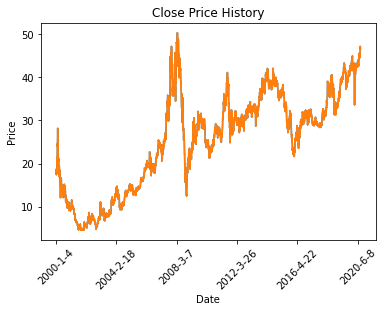

In [39]:
#歷史股價走勢圖
import matplotlib.ticker as ticker

#tick_spacing = 1
tick_spacing = 1000
#通过修改tick_spacing的值可以修改x轴的密度
#1的时候1到16，5的时候只显示几个
fig, ax = plt.subplots(1,1)
ax.plot(df_1101['close'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.plot(df_1101['close'], label='close')
plt.title('Close Price History')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='date'>

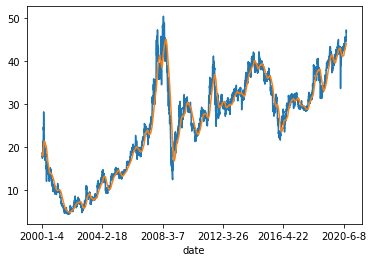

In [46]:
c = df_1101['close']

# 近60日收盤
c60 = df_1101['close'].rolling(60, min_periods=1).mean()

# 畫圖
df_1101['close'].plot()
c60.plot()

<AxesSubplot:xlabel='date'>

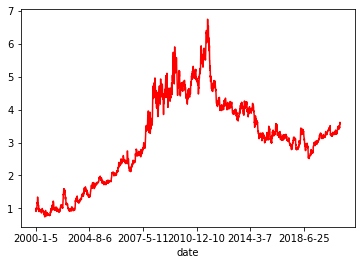

In [50]:
# 進60日收盤
c60 = c.rolling(60, min_periods=1).mean()

# 買入訊號
signal = (c > c60)

# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
#(c.shift(-1) / c).cumprod().plot(color='blue')